In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### # Прочитайте csv файл (використовуйте функцію read_csv)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv")

### # Виведіть перші п'ять рядків (використовується функція head)

In [4]:
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


### # Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
print(df.shape)


(550, 7)


### # Про скільки книг зберігає дані датасет?
Відповідь: 550

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

### # Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [7]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Відповідь: ні

### # Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [8]:
print(df["genre"].unique())

['Non Fiction' 'Fiction']


Відповідь: унікальні жанри: "Non Fiction", "Fiction"

### # Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

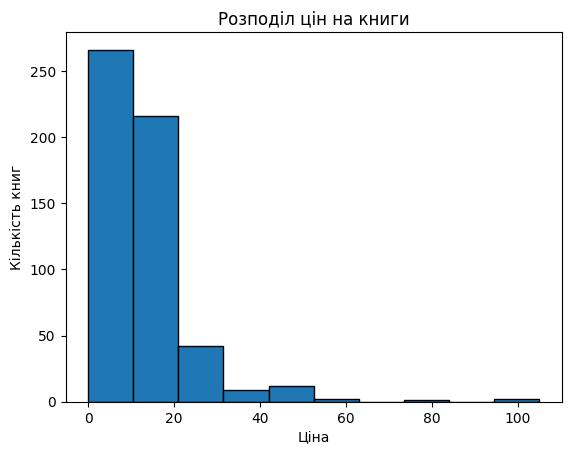

In [14]:
plt.hist(df["price"], edgecolor='black')
plt.xlabel("Ціна")
plt.ylabel("Кількість книг")
plt.title("Розподіл цін на книги")
plt.show()


### # Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [16]:
max_price = df["price"].max()
min_price = df["price"].min()
mean_price = df["price"].mean()
median_price = df["price"].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Відповідь: Максимальна ціна? 105

Відповідь: Мінімальна ціна? 0

Відповідь: Середня ціна? 13.1

Відповідь: Медіанна ціна? 11.0

Який рейтинг у датасеті найвищий?

In [18]:
highest_rating = df["user_rating"].max()
print(highest_rating)

4.9


Відповідь: 4.9

### # Скільки книг мають такий рейтинг?

In [20]:
num_books_with_highest_rating = df["user_rating"].value_counts()[highest_rating]
print(num_books_with_highest_rating)


52


Відповідь: 52 книги

### # Яка книга має найбільше відгуків?

In [21]:
max_reviews_index = df["reviews"].idxmax()
book_with_most_reviews = df.loc[max_reviews_index, "name"]
print(book_with_most_reviews)


Where the Crawdads Sing


Відповідь: "Where the Crawdads Sing"

### # З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [23]:
df_books_2015 = df[df["year"] == 2015]
max_price_index = df_books_2015["price"].idxmax()
most_expensive_book_2015 = df_books_2015.loc[max_price_index, "name"]
print(most_expensive_book_2015)


Publication Manual of the American Psychological Association, 6th Edition


Відповідь: "Publication Manual of the American Psychological Association, 6th Edition"

### # Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [24]:
count_fiction_2010 = df[(df["genre"] == "Fiction") & (df["year"] == 2010)].shape[0]
print(count_fiction_2010)


20


Відповідь: 20

### # Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [25]:
count_rating_4_9 = df[(df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))].shape[0]
print(count_rating_4_9)


1


Відповідь: 1

### # І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [26]:
sorted_books_2015_under_8 = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by="price")
print(sorted_books_2015_under_8)


                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

### # Яка книга остання у відсортованому списку?

In [27]:
last_book = sorted_books_2015_under_8.iloc[-1]
print(last_book)

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


Відповідь: Old School (Diary of a Wimpy Kid #10)

### # Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [28]:
price_stats_by_genre = df.groupby('genre')['price'].agg(['min', 'max'])
print(price_stats_by_genre)


             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Відповідь: Максимальна ціна для жанру Fiction: 82

Відповідь: Мінімальна ціна для жанру Fiction: 0

Відповідь: Максимальна ціна для жанру Non Fiction: 105

Відповідь: Мінімальна ціна для жанру Non Fiction: 0

### # Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [30]:
author_book_counts = df.groupby('author')['name'].count().reset_index()
author_book_counts.columns = ['author', 'book_count']
print(author_book_counts)

                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [32]:
print(author_book_counts.shape)

(248, 2)


Якої розмірності вийшла таблиця? Відповідь: 248x2

### # Який автор має найбільше книг?

In [45]:
most_prolific_author = author_book_counts[author_book_counts['book_count'] == author_book_counts['book_count'].max()]
print(most_prolific_author)




          author  book_count
120  Jeff Kinney          12


Який автор має найбільше книг? Відповідь: Jeff Kinney

### # Скільки книг цього автора?

Скільки книг цього автора? Відповідь: 12

### # Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [46]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index()
author_avg_rating.columns = ['author', 'avg_rating']
print(author_avg_rating)

                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


### # У якого автора середній рейтинг мінімальний?

In [47]:
author_min_avg_rating = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]
print(author_min_avg_rating['author'])


Donna Tartt


У якого автора середній рейтинг мінімальний? Відповідь: "Donna Tartt"

### # Який у цього автора середній рейтинг?

In [48]:
print(author_min_avg_rating['avg_rating'])


3.9


Який у цього автора середній рейтинг? 3.9

### # З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [49]:
combined_df = pd.concat([author_book_counts, author_avg_rating], axis=1)
print(combined_df)

                         author  book_count                      author  \
0              Abraham Verghese           2            Abraham Verghese   
1                Adam Gasiewski           1              Adam Gasiewski   
2                 Adam Mansbach           1               Adam Mansbach   
3                     Adir Levy           1                   Adir Levy   
4    Admiral William H. McRaven           1  Admiral William H. McRaven   
..                          ...         ...                         ...   
243             Walter Isaacson           3             Walter Isaacson   
244               William Davis           2               William Davis   
245            William P. Young           2            William P. Young   
246            Wizards RPG Team           3            Wizards RPG Team   
247                Zhi Gang Sha           2                Zhi Gang Sha   

     avg_rating  
0      4.600000  
1      4.400000  
2      4.800000  
3      4.800000  
4      4.

### # Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [50]:
sorted_df = combined_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
print(sorted_df)

                                 author  book_count  \
171                      Muriel Barbery           1   
43                         Chris Cleave           1   
109                   Ian K. Smith M.D.           1   
186                        Pierre Dukan           1   
81                     Elizabeth Strout           1   
..                                  ...         ...   
11   American Psychological Association          10   
226                     Suzanne Collins          11   
92                         Gary Chapman          11   
197                        Rick Riordan          11   
120                         Jeff Kinney          12   

                                 author  avg_rating  
171                      Muriel Barbery    4.000000  
43                         Chris Cleave    4.100000  
109                   Ian K. Smith M.D.    4.100000  
186                        Pierre Dukan    4.100000  
81                     Elizabeth Strout    4.200000  
..             

### # Який автор перший у списку?

In [56]:
first_author = sorted_df.iloc[0]['author']
print(first_author)

author    Muriel Barbery
author    Muriel Barbery
Name: 171, dtype: object


Який автор перший у списку? Muriel Barbery